#### Загрузим данные из csv-файла

In [8]:
import pandas as pd

dataset = pd.read_csv("./dataset_product_per_country.csv", engine='python', on_bad_lines='skip', sep = ';')

#### Изучим содержимое датасета, используя различные методы, содержащиеся в библиотеке Pandas

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121079 entries, 0 to 121078
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   country_name  121079 non-null  object
 1   date          121079 non-null  object
 2   parameter     121079 non-null  object
 3   product       121079 non-null  object
 4   value         121056 non-null  object
 5   r1            121079 non-null  int64 
 6   r2            121079 non-null  int64 
 7   unit          121079 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.4+ MB


In [10]:
dataset.head()

,country_name,date,parameter,product,value,r1,r2,unit
0,Australia,12.01.2023,Net Electricity Production,Electricity,22646.1901,8,719,GWh
1,Australia,12.01.2023,Net Electricity Production,Total Combustible Fuels,13397.9356,100,227,GWh
2,Australia,12.01.2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,80,919,GWh
3,Australia,12.01.2023,Net Electricity Production,Oil and Petroleum Products,289.5415,90,890,GWh
4,Australia,12.01.2023,Net Electricity Production,Natural Gas,3091.9272,98,704,GWh


In [11]:
dataset.tail()

,country_name,date,parameter,product,value,r1,r2,unit
121074,United States,01.01.2010,Total Imports,Electricity,5808.577,42,331,GWh
121075,United States,01.01.2010,Total Exports,Electricity,996.567,7,165,GWh
121076,United States,01.01.2010,Used for pumped storage,Electricity,2283.322,96,831,GWh
121077,United States,01.01.2010,Distribution Losses,Electricity,22933.297,83,603,GWh
121078,United States,01.01.2010,Final Consumption (Calculated),Electricity,343866.418,86,739,GWh


In [12]:
dataset.dtypes

country_name    object
date            object
parameter       object
product         object
value           object
r1               int64
r2               int64
unit            object
dtype: object

In [13]:
dataset.describe()

,r1,r2
count,121079.000000,121079.000000
mean,50.532239,549.944912
std,28.824189,259.487929
min,1.000000,100.000000
25%,26.000000,325.000000
50%,51.000000,551.000000
75%,75.000000,774.000000
max,100.000000,1000.000000


In [14]:
dataset.columns

Index(['country_name', 'date', 'parameter', 'product', 'value', 'r1', 'r2',
       'unit'],
      dtype='object')

In [15]:
dataset['country_name'].value_counts().head()

country_name
France            3348
United Kingdom    3264
United States     3240
Germany           3230
Turkey            3205
Name: count, dtype: int64

#### Изменим структуру датасета, переименуем столбцы и индексы

In [19]:
dataset_rename = dataset.rename(columns={   # Заметим также, что без параметра inplace=True, сам датасет не изменяется
    'country_name': 'Страна',
    'date': 'Дата',
    'parameter': 'Параметр',
    'product': 'Продукт',
    'value': 'Значение',
    'r1': 'r1',
    'r2': 'r2',
    'unit': 'Юнит'
})
dataset_rename.columns

Index(['Страна', 'Дата', 'Параметр', 'Продукт', 'Значение', 'r1', 'r2',
       'Юнит'],
      dtype='object')

In [20]:
dataset_melt = dataset_rename
dataset_melt = pd.melt(dataset_rename, id_vars=['Страна', 'Дата', 'Параметр', 'Продукт', 'Значение', 'Юнит'], var_name='Переменные', value_name='ЗначениеПеременной')
dataset_melt

,Страна,Дата,Параметр,Продукт,Значение,Юнит,Переменные,ЗначениеПеременной
0,Australia,12.01.2023,Net Electricity Production,Electricity,22646.1901,GWh,r1,8
1,Australia,12.01.2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh,r1,100
2,Australia,12.01.2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh,r1,80
3,Australia,12.01.2023,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh,r1,90
4,Australia,12.01.2023,Net Electricity Production,Natural Gas,3091.9272,GWh,r1,98
...,...,...,...,...,...,...,...,...
242153,United States,01.01.2010,Total Imports,Electricity,5808.577,GWh,r2,331
242154,United States,01.01.2010,Total Exports,Electricity,996.567,GWh,r2,165
242155,United States,01.01.2010,Used for pumped storage,Electricity,2283.322,GWh,r2,831
242156,United States,01.01.2010,Distribution Losses,Electricity,22933.297,GWh,r2,603


In [21]:
dataset_index = dataset_rename
dataset_index.set_index('Страна', inplace=True)
dataset_index.head()

,Дата,Параметр,Продукт,Значение,r1,r2,Юнит
Страна,,,,,,,
Australia,12.01.2023,Net Electricity Production,Electricity,22646.1901,8,719,GWh
Australia,12.01.2023,Net Electricity Production,Total Combustible Fuels,13397.9356,100,227,GWh
Australia,12.01.2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,80,919,GWh
Australia,12.01.2023,Net Electricity Production,Oil and Petroleum Products,289.5415,90,890,GWh
Australia,12.01.2023,Net Electricity Production,Natural Gas,3091.9272,98,704,GWh


In [22]:
print(dataset_index.columns)
dataset_reset = dataset_index.reset_index(names = ['Страна'])
dataset_reset.head()

Index(['Дата', 'Параметр', 'Продукт', 'Значение', 'r1', 'r2', 'Юнит'], dtype='object')


,Страна,Дата,Параметр,Продукт,Значение,r1,r2,Юнит
0,Australia,12.01.2023,Net Electricity Production,Electricity,22646.1901,8,719,GWh
1,Australia,12.01.2023,Net Electricity Production,Total Combustible Fuels,13397.9356,100,227,GWh
2,Australia,12.01.2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,80,919,GWh
3,Australia,12.01.2023,Net Electricity Production,Oil and Petroleum Products,289.5415,90,890,GWh
4,Australia,12.01.2023,Net Electricity Production,Natural Gas,3091.9272,98,704,GWh


In [23]:
dataset_drop = dataset_reset.drop(columns=['Юнит'])
dataset_drop.head()

,Страна,Дата,Параметр,Продукт,Значение,r1,r2
0,Australia,12.01.2023,Net Electricity Production,Electricity,22646.1901,8,719
1,Australia,12.01.2023,Net Electricity Production,Total Combustible Fuels,13397.9356,100,227
2,Australia,12.01.2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,80,919
3,Australia,12.01.2023,Net Electricity Production,Oil and Petroleum Products,289.5415,90,890
4,Australia,12.01.2023,Net Electricity Production,Natural Gas,3091.9272,98,704


In [24]:
dataset_rename = dataset_rename.reset_index()

dataset_concat = pd.concat([dataset_rename, dataset_reset]).reset_index(drop = True)
dataset_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Страна    242158 non-null  object
 1   Дата      242158 non-null  object
 2   Параметр  242158 non-null  object
 3   Продукт   242158 non-null  object
 4   Значение  242112 non-null  object
 5   r1        242158 non-null  int64 
 6   r2        242158 non-null  int64 
 7   Юнит      242158 non-null  object
dtypes: int64(2), object(6)
memory usage: 14.8+ MB


In [25]:
dataset_concat.tail()

,Страна,Дата,Параметр,Продукт,Значение,r1,r2,Юнит
242153,United States,01.01.2010,Total Imports,Electricity,5808.577,42,331,GWh
242154,United States,01.01.2010,Total Exports,Electricity,996.567,7,165,GWh
242155,United States,01.01.2010,Used for pumped storage,Electricity,2283.322,96,831,GWh
242156,United States,01.01.2010,Distribution Losses,Electricity,22933.297,83,603,GWh
242157,United States,01.01.2010,Final Consumption (Calculated),Electricity,343866.418,86,739,GWh


#### Изменим тип данных некоторых колонок и сами данные в некоторых из них

In [26]:
dataset_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121079 entries, 0 to 121078
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Страна    121079 non-null  object
 1   Дата      121079 non-null  object
 2   Параметр  121079 non-null  object
 3   Продукт   121079 non-null  object
 4   Значение  121056 non-null  object
 5   r1        121079 non-null  int64 
 6   r2        121079 non-null  int64 
 7   Юнит      121079 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.4+ MB


In [27]:
dataset_rename['Дата'] = pd.to_datetime(dataset_rename['Дата'])
dataset_rename['r1'] = dataset_rename['r1'].astype(int)
dataset_rename['r2'] = dataset_rename['r2'].astype(int)
dataset_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121079 entries, 0 to 121078
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Страна    121079 non-null  object        
 1   Дата      121079 non-null  datetime64[ns]
 2   Параметр  121079 non-null  object        
 3   Продукт   121079 non-null  object        
 4   Значение  121056 non-null  object        
 5   r1        121079 non-null  int64         
 6   r2        121079 non-null  int64         
 7   Юнит      121079 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 7.4+ MB


In [28]:
dataset_replace = dataset_rename
dataset_replace['Юнит'] = dataset_replace['Юнит'].replace({'GWh': 'Гигаватт-часов'})
dataset_replace.head()

,Страна,Дата,Параметр,Продукт,Значение,r1,r2,Юнит
0,Australia,2023-12-01,Net Electricity Production,Electricity,22646.1901,8,719,Гигаватт-часов
1,Australia,2023-12-01,Net Electricity Production,Total Combustible Fuels,13397.9356,100,227,Гигаватт-часов
2,Australia,2023-12-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,80,919,Гигаватт-часов
3,Australia,2023-12-01,Net Electricity Production,Oil and Petroleum Products,289.5415,90,890,Гигаватт-часов
4,Australia,2023-12-01,Net Electricity Production,Natural Gas,3091.9272,98,704,Гигаватт-часов


In [29]:
dataset_dummies = pd.get_dummies(dataset_rename, columns=['Параметр'])
dataset_dummies.head()

,Страна,Дата,Продукт,Значение,r1,r2,Юнит,Параметр_Distribution Losses,Параметр_Final Consumption (Calculated),Параметр_Net Electricity Production,Параметр_Remarks,Параметр_Total Exports,Параметр_Total Imports,Параметр_Used for pumped storage
0,Australia,2023-12-01,Electricity,22646.1901,8,719,Гигаватт-часов,False,False,True,False,False,False,False
1,Australia,2023-12-01,Total Combustible Fuels,13397.9356,100,227,Гигаватт-часов,False,False,True,False,False,False,False
2,Australia,2023-12-01,"Coal, Peat and Manufactured Gases",9768.5223,80,919,Гигаватт-часов,False,False,True,False,False,False,False
3,Australia,2023-12-01,Oil and Petroleum Products,289.5415,90,890,Гигаватт-часов,False,False,True,False,False,False,False
4,Australia,2023-12-01,Natural Gas,3091.9272,98,704,Гигаватт-часов,False,False,True,False,False,False,False


#### Преобразуем некоторые значения

In [31]:
dataset_apply = dataset_rename
dataset_apply['Продукт'] = dataset_apply['Продукт'].apply(lambda x: x.lower())
dataset_apply.head()

,Страна,Дата,Параметр,Продукт,Значение,r1,r2,Юнит
0,Australia,2023-12-01,Net Electricity Production,electricity,22646.1901,8,719,Гигаватт-часов
1,Australia,2023-12-01,Net Electricity Production,total combustible fuels,13397.9356,100,227,Гигаватт-часов
2,Australia,2023-12-01,Net Electricity Production,"coal, peat and manufactured gases",9768.5223,80,919,Гигаватт-часов
3,Australia,2023-12-01,Net Electricity Production,oil and petroleum products,289.5415,90,890,Гигаватт-часов
4,Australia,2023-12-01,Net Electricity Production,natural gas,3091.9272,98,704,Гигаватт-часов


#### Проверим наличие дупликатов данных

In [34]:
dataset_duplicates = dataset_rename['Страна'].duplicated(keep = False)
dataset_true_indices = dataset_duplicates[dataset_duplicates].index
print(dataset_true_indices)
print(dataset_duplicates.name)
dataset_duplicates.head()

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       121069, 121070, 121071, 121072, 121073, 121074, 121075, 121076, 121077,
       121078],
      dtype='int64', length=121079)
Страна


0    True
1    True
2    True
3    True
4    True
Name: Страна, dtype: bool


#### Определим, удалим и заполним пропуски данных (NaN)

In [35]:
dataset_rows_with_nulls = dataset_rename[dataset_rename.isnull().any(axis=1)]
dataset_rows_with_nulls.head()

,Страна,Дата,Параметр,Продукт,Значение,r1,r2,Юнит
69,Chile,2023-12-01,Remarks,data is estimated for this month,NaN,34,916,Гигаватт-часов
97,Costa Rica,2023-12-01,Remarks,data is estimated for this month,NaN,94,193,Гигаватт-часов
150,Estonia,2023-12-01,Net Electricity Production,hydro,NaN,32,953,Гигаватт-часов
152,Estonia,2023-12-01,Net Electricity Production,solar,NaN,27,192,Гигаватт-часов
186,France,2023-12-01,Net Electricity Production,geothermal,NaN,2,128,Гигаватт-часов


In [36]:
dataset_dropna = dataset_rename.dropna()
dataset_dropna.head(72)

,Страна,Дата,Параметр,Продукт,Значение,r1,r2,Юнит
0,Australia,2023-12-01,Net Electricity Production,electricity,22646.1901,8,719,Гигаватт-часов
1,Australia,2023-12-01,Net Electricity Production,total combustible fuels,13397.9356,100,227,Гигаватт-часов
2,Australia,2023-12-01,Net Electricity Production,"coal, peat and manufactured gases",9768.5223,80,919,Гигаватт-часов
3,Australia,2023-12-01,Net Electricity Production,oil and petroleum products,289.5415,90,890,Гигаватт-часов
4,Australia,2023-12-01,Net Electricity Production,natural gas,3091.9272,98,704,Гигаватт-часов
...,...,...,...,...,...,...,...,...
67,Canada,2023-12-01,Distribution Losses,electricity,3082.1795,87,597,Гигаватт-часов
68,Canada,2023-12-01,Final Consumption (Calculated),electricity,52164.5456,47,752,Гигаватт-часов
70,Chile,2023-12-01,Net Electricity Production,electricity,7734.9912,68,1000,Гигаватт-часов
71,Chile,2023-12-01,Net Electricity Production,total combustible fuels,2099.8702,28,934,Гигаватт-часов


#### Удалим выбросы данных

In [40]:
print(dataset_rename['r2'].min())
print(dataset_rename['r2'].max())

100
1000


In [41]:
dataset_clipped = dataset_rename
dataset_clipped['r2'] = dataset_clipped['r2'].clip(lower=200, upper=900)
print(dataset_clipped['r2'].min())
print(dataset_clipped['r2'].max())

200
900


#### Визуализируем данные. Построим некоторые графики

In [42]:
dataset_rename['Значение'] = pd.to_numeric(dataset_rename['Значение'], errors='coerce')
dataset_rename.dtypes

Страна              object
Дата        datetime64[ns]
Параметр            object
Продукт             object
Значение           float64
r1                   int64
r2                   int64
Юнит                object
dtype: object

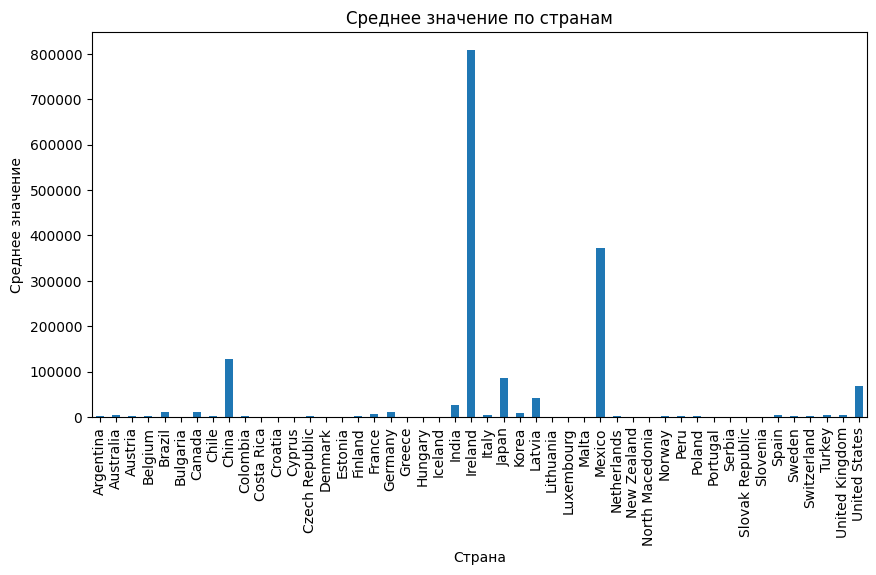

In [44]:
import matplotlib.pyplot as plt
dataset_rename['Значение'] = pd.to_numeric(dataset_rename['Значение'], errors='coerce')
plt.figure(figsize=(10, 5))
dataset_rename.groupby('Страна')['Значение'].mean().plot(kind='bar')
plt.title('Среднее значение по странам')
plt.ylabel('Среднее значение')
plt.xlabel('Страна')
plt.xticks(rotation=90)
plt.show()

In [45]:
dataset_ireland = dataset_rename[dataset_rename['Страна'] == 'Ireland']
dataset_ireland['Значение'].mean()

807516.3451003267

#### Определим корреляции и построим корреляционную матрицу

In [46]:
print(dataset_rename['Значение']. corr(dataset_rename['Значение']))
print(dataset_rename['r1']. corr(dataset_rename['r2']))


1.0
0.006480915739899608


In [47]:
dataset_for_corr_matrix = dataset_rename[['Значение', 'r1', 'r2']]
dataset_for_corr_matrix.corr()
corr_matrix = dataset_for_corr_matrix.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Значение,r1,r2
Значение,1.000000,0.001328,-0.001967
r1,0.001328,1.000000,0.006481
r2,-0.001967,0.006481,1.000000


#### Группируем и агрегируем данные

In [48]:
dataset_pivot = dataset_rename
pd.pivot_table(dataset_pivot,
               index=['Параметр',"Страна"],
               values=["Значение", "r1", 'r2'],
               fill_value=0).head(100)

r1          r2       Значение
Параметр                   Страна                                         
Distribution Losses        Australia  50.660714  570.136905     985.842732
                           Austria    48.440476  532.220238     279.700333
                           Belgium    51.648810  556.303571     316.294875
                           Canada     49.303571  576.500000    3359.805729
                           Chile      48.023810  538.571429     324.197897
...                                         ...         ...            ...
Net Electricity Production Iceland    50.684383  553.485564     509.322882
                           India      52.349483  552.828165   26107.593299
                           Ireland    50.522817  546.452877     636.634002
                           Italy      50.844298  546.674561    5238.796230
                           Japan      50.368111  551.010097  102001.104642

[100 rows x 3 columns]

#### Определим существование зависимостей между переменными, например, путем анализа таблиц сопряженностей и сводных таблиц

In [50]:
from scipy.stats import chi2_contingency, fisher_exact
contingency_table = pd.crosstab(dataset_rename['Страна'], dataset_rename['Параметр'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
contingency_table.head()

Параметр,Distribution Losses,Final Consumption (Calculated),Net Electricity Production,Remarks,Total Exports,Total Imports,Used for pumped storage
Страна,,,,,,,
Argentina,0,0,1462,0,0,0,0
Australia,168,169,2018,0,48,48,168
Austria,168,168,2280,0,168,168,168
Belgium,168,169,2280,0,168,168,168
Brazil,0,0,1548,0,0,0,0


In [51]:
print("\nРезультаты теста хи-квадрат:")
print(f"Статистика хи-квадрат: {chi2_stat}")
print(f"p-значение: {p_value}")
print(f"Степени свободы: {dof}")
print(f"Ожидаемые частоты:\n")

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
expected_df.head()


Результаты теста хи-квадрат:
Статистика хи-квадрат: 9244.008866742963
p-значение: 0.0
Степени свободы: 282
Ожидаемые частоты:



Параметр,Distribution Losses,Final Consumption (Calculated),Net Electricity Production,Remarks,Total Exports,Total Imports,Used for pumped storage
Страна,,,,,,,
Argentina,72.847034,72.943632,1126.792557,0.169047,65.396906,65.336532,58.514292
Australia,130.496841,130.669885,2018.515531,0.302827,117.150819,117.042666,104.821431
Austria,155.460154,155.666301,2404.646223,0.360756,139.561113,139.432271,124.873182
Belgium,155.509981,155.716194,2405.416943,0.360872,139.605844,139.476961,124.913205
Brazil,77.132153,77.234434,1193.074472,0.178991,69.243783,69.179858,61.956310
